In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import masks
import gif
import raw
import lineage

In [2]:
# Input file
fN = h5py.File("../6819_2/6819_2_featuresN.hdf5","r")

# Define dorsal and ventral coordinates
coordinates = fN['coordinates']
dorsal = coordinates['dorsal_contours']
ventral = coordinates['ventral_contours']

# trajectory_data and timeseries_data
traj = pd.read_hdf("../6819_2/6819_2_featuresN.hdf5", '/trajectories_data')
timeseries = fN['timeseries_data']

In [3]:
# Get wells - data from timeseries_data, at position [2]
wells = ['A5', 'A6', 'A7', 'A8', 'B5', 'B6', 'B7', 'B8', 'C5', 'C6', 'C7', 'C8', 'D5', 'D6', 'D7', 'D8']
#wells = [each.encode() for each in wells]

well_dict = {}
for each in wells:
    well_dict[each] = []
    
#print('A1'.encode().decode())
for i, each in enumerate(timeseries[:]):  # "i" == index
    well = each[2].decode()
    #well_dict[well] = []
    if well in well_dict.keys():
        well_dict[well].append(i)

In [4]:
# Well positions:

d8 = [180, 710, 180, 710]
d7 = [180, 710, 900, 1430]
d6 = [180, 710, 1620, 2150]
d5 = [180, 710, 2340, 2870]

c8 = [910, 1440, 180, 710]
c7 = [910, 1440, 900, 1430]
c6 = [910, 1440, 1620, 2150]
c5 = [910, 1440, 2340, 2870]

b8 = [1630, 2160, 180, 710]
b7 = [1630, 2160, 900, 1430]
b6 = [1630, 2160, 1620, 2150]
b5 = [1630, 2160, 2340, 2870]

a8 = [2350, 2880, 180, 710]
a7 = [2350, 2880, 900, 1430]
a6 = [2350, 2880, 1620, 2150]
a5 = [2350, 2880, 2340, 2870]

In [5]:
well_names = list(well_dict.keys())
well_names

['A5',
 'A6',
 'A7',
 'A8',
 'B5',
 'B6',
 'B7',
 'B8',
 'C5',
 'C6',
 'C7',
 'C8',
 'D5',
 'D6',
 'D7',
 'D8']

In [6]:
### Finish making masks~


#for well in well_names:
#    masks.make_well_masks(well=well, traj=traj, dorsal=dorsal, ventral=ventral, well_dict=well_dict, down_sampling=6, file_dir="../6819_2/", sequential=False)

# Raw wells

In [7]:
well_names = well_dict.keys()
wells = [a5, a6, a6, a8, b5, b6, b7, b8, c5, c6, c7, c8, d5, d6, d7, d8]

In [8]:
for i, well_name in enumerate(well_names):
    output = "../6819_2/raw_wells/%s_raw.npy" % well_name
    raw.get_raw_well(wells[i], well_name=well_name, video_path="../6819_2/6819_2.mp4", filename=output, frame_start=0, frame_end=9001, down_sampling=1) 

-------- A5 --------
-------- A6 --------
-------- A7 --------
-------- A8 --------
-------- B5 --------
-------- B6 --------
-------- B7 --------
-------- B8 --------
-------- C5 --------
-------- C6 --------
-------- C7 --------
-------- C8 --------
-------- D5 --------
-------- D6 --------
-------- D7 --------
-------- D8 --------


In [9]:
for well_name in well_names:
    raw_video_path = '../6819_2/raw_wells/%s_raw.npy' % well_name
    txt = '../6819_2/%s_not_empty.txt' % well_name
    raw.make_raw_videos(raw_video_path=raw_video_path, mask_frame_info_fn=txt, well_name=well_name, output_dir='../6819_2')

(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)


unique_worm_ids:  [21, 23]
sequential ids:  [1, 2]


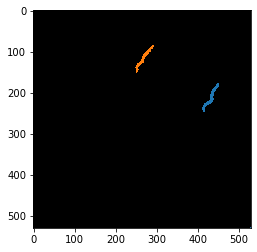

In [24]:
#gif.plot_gif(np.load('../6819_2/D7_raw_1.npy'), '../6819_2/gif/D7_raw_1.gif', raw=True)
gif.plot_gif(np.load('../6819_2/D7_mask_1.npy'), '../6819_2/gif/D7_mask_1.gif')

# Lineages

In [18]:
from lineage import make_lineage

a5_1 = make_lineage(traj, well_dict, 'A5', "6819_2", "../6819_2/A5_mask_1.npy", 1)
a5_2 = make_lineage(traj, well_dict, 'A5', "6819_2", "../6819_2/A5_mask_2.npy", 2)

a6_1 = make_lineage(traj, well_dict, 'A6', "6819_2", "../6819_2/A6_mask_1.npy", 1)
a6_2 = make_lineage(traj, well_dict, 'A6', "6819_2", "../6819_2/A6_mask_2.npy", 2)

a7_1 = make_lineage(traj, well_dict, 'A7', "6819_2", "../6819_2/A7_mask_1.npy", 1)
a8_1 = make_lineage(traj, well_dict, 'A8', "6819_2", "../6819_2/A8_mask_1.npy", 1)
a8_2 = make_lineage(traj, well_dict, 'A8', "6819_2", "../6819_2/A8_mask_2.npy", 2)
a8_3 = make_lineage(traj, well_dict, 'A8', "6819_2", "../6819_2/A8_mask_3.npy", 3)
a8_4 = make_lineage(traj, well_dict, 'A8', "6819_2", "../6819_2/A8_mask_4.npy", 4)
a8_5 = make_lineage(traj, well_dict, 'A8', "6819_2", "../6819_2/A8_mask_5.npy", 5)
a8_6 = make_lineage(traj, well_dict, 'A8', "6819_2", "../6819_2/A8_mask_6.npy", 6)
a8_7 = make_lineage(traj, well_dict, 'A8', "6819_2", "../6819_2/A8_mask_7.npy", 7)
a8_8 = make_lineage(traj, well_dict, 'A8', "6819_2", "../6819_2/A8_mask_8.npy", 8)

b5_1 = make_lineage(traj, well_dict, 'B5', "6819_2", "../6819_2/B5_mask_1.npy", 1)

b6_1 = make_lineage(traj, well_dict, 'B6', "6819_2", "../6819_2/B6_mask_1.npy", 1)
b6_2 = make_lineage(traj, well_dict, 'B6', "6819_2", "../6819_2/B6_mask_2.npy", 2)
b6_3 = make_lineage(traj, well_dict, 'B6', "6819_2", "../6819_2/B6_mask_3.npy", 3)
b6_4 = make_lineage(traj, well_dict, 'B6', "6819_2", "../6819_2/B6_mask_4.npy", 4)

b7_1 = make_lineage(traj, well_dict, 'B7', "6819_2", "../6819_2/B7_mask_1.npy", 1)
b7_2 = make_lineage(traj, well_dict, 'B7', "6819_2", "../6819_2/B7_mask_2.npy", 2)
b8_1 = make_lineage(traj, well_dict, 'B8', "6819_2", "../6819_2/B8_mask_1.npy", 1)

c5_1 = make_lineage(traj, well_dict, 'C5', "6819_2", "../6819_2/C5_mask_1.npy", 1)
c5_2 = make_lineage(traj, well_dict, 'C5', "6819_2", "../6819_2/C5_mask_2.npy", 2)
c6_1 = make_lineage(traj, well_dict, 'C6', "6819_2", "../6819_2/C6_mask_1.npy", 1)
c6_2 = make_lineage(traj, well_dict, 'C6', "6819_2", "../6819_2/C6_mask_2.npy", 2)
c7_1 = make_lineage(traj, well_dict, 'C7', "6819_2", "../6819_2/C7_mask_1.npy", 1)
c7_2 = make_lineage(traj, well_dict, 'C7', "6819_2", "../6819_2/C7_mask_2.npy", 2)
c7_3 = make_lineage(traj, well_dict, 'C7', "6819_2", "../6819_2/C7_mask_3.npy", 3)
c7_4 = make_lineage(traj, well_dict, 'C7', "6819_2", "../6819_2/C7_mask_4.npy", 4)
c7_5 = make_lineage(traj, well_dict, 'C7', "6819_2", "../6819_2/C7_mask_5.npy", 5)

c8_1 = make_lineage(traj, well_dict, 'C8', "6819_2", "../6819_2/C8_mask_1.npy", 1)
c8_2 = make_lineage(traj, well_dict, 'C8', "6819_2", "../6819_2/C8_mask_2.npy", 2)

d5_1 = make_lineage(traj, well_dict, 'D5', "6819_2", "../6819_2/D5_mask_1.npy", 1)
d5_2 = make_lineage(traj, well_dict, 'D5', "6819_2", "../6819_2/D5_mask_2.npy", 2)
d5_3 = make_lineage(traj, well_dict, 'D5', "6819_2", "../6819_2/D5_mask_3.npy", 3)

d6_1 = make_lineage(traj, well_dict, 'D6', "6819_2", "../6819_2/D6_mask_1.npy", 1)

d7_1 = make_lineage(traj, well_dict, 'D7', "6819_2", "../6819_2/D7_mask_1.npy", 1)
d7_2 = make_lineage(traj, well_dict, 'D7', "6819_2", "../6819_2/D7_mask_2.npy", 2)
d8_1 = make_lineage(traj, well_dict, 'D8', "6819_2", "../6819_2/D8_mask_1.npy", 1)
d8_2 = make_lineage(traj, well_dict, 'D8', "6819_2", "../6819_2/D8_mask_2.npy", 2)

In [19]:
masks_fn = [
    "../6819_2/A5_mask_1.npy",
    "../6819_2/A5_mask_2.npy",

    "../6819_2/A6_mask_1.npy",
    "../6819_2/A6_mask_2.npy",

    "../6819_2/A7_mask_1.npy",
    "../6819_2/A8_mask_1.npy",
    "../6819_2/A8_mask_2.npy",
    "../6819_2/A8_mask_3.npy",
    "../6819_2/A8_mask_4.npy",
    "../6819_2/A8_mask_5.npy",
    "../6819_2/A8_mask_6.npy",
    "../6819_2/A8_mask_7.npy",
    "../6819_2/A8_mask_8.npy",

    "../6819_2/B5_mask_1.npy",

    "../6819_2/B6_mask_1.npy",
    "../6819_2/B6_mask_2.npy",
    "../6819_2/B6_mask_3.npy",
    "../6819_2/B6_mask_4.npy",

    "../6819_2/B7_mask_1.npy",
    "../6819_2/B7_mask_2.npy",
    "../6819_2/B8_mask_1.npy",

    "../6819_2/C5_mask_1.npy",
    "../6819_2/C5_mask_2.npy",
    "../6819_2/C6_mask_1.npy",
    "../6819_2/C6_mask_2.npy",
    "../6819_2/C7_mask_1.npy",
    "../6819_2/C7_mask_2.npy",
    "../6819_2/C7_mask_3.npy",
    "../6819_2/C7_mask_4.npy",
    "../6819_2/C7_mask_5.npy",

    "../6819_2/C8_mask_1.npy",
    "../6819_2/C8_mask_2.npy",

    "../6819_2/D5_mask_1.npy",
    "../6819_2/D5_mask_2.npy",
    "../6819_2/D5_mask_3.npy",

    "../6819_2/D6_mask_1.npy",

    "../6819_2/D7_mask_1.npy",
    "../6819_2/D7_mask_2.npy",
    "../6819_2/D8_mask_1.npy",
    "../6819_2/D8_mask_2.npy"
]

In [20]:
raw_fn = [
    "../6819_2/A5_raw_1.npy",
    "../6819_2/A5_raw_2.npy",

    "../6819_2/A6_raw_1.npy",
    "../6819_2/A6_raw_2.npy",

    "../6819_2/A7_raw_1.npy",
    "../6819_2/A8_raw_1.npy",
    "../6819_2/A8_raw_2.npy",
    "../6819_2/A8_raw_3.npy",
    "../6819_2/A8_raw_4.npy",
    "../6819_2/A8_raw_5.npy",
    "../6819_2/A8_raw_6.npy",
    "../6819_2/A8_raw_7.npy",
    "../6819_2/A8_raw_8.npy",

    "../6819_2/B5_raw_1.npy",

    "../6819_2/B6_raw_1.npy",
    "../6819_2/B6_raw_2.npy",
    "../6819_2/B6_raw_3.npy",
    "../6819_2/B6_raw_4.npy",

    "../6819_2/B7_raw_1.npy",
    "../6819_2/B7_raw_2.npy",
    "../6819_2/B8_raw_1.npy",

    "../6819_2/C5_raw_1.npy",
    "../6819_2/C5_raw_2.npy",
    "../6819_2/C6_raw_1.npy",
    "../6819_2/C6_raw_2.npy",
    "../6819_2/C7_raw_1.npy",
    "../6819_2/C7_raw_2.npy",
    "../6819_2/C7_raw_3.npy",
    "../6819_2/C7_raw_4.npy",
    "../6819_2/C7_raw_5.npy",

    "../6819_2/C8_raw_1.npy",
    "../6819_2/C8_raw_2.npy",

    "../6819_2/D5_raw_1.npy",
    "../6819_2/D5_raw_2.npy",
    "../6819_2/D5_raw_3.npy",

    "../6819_2/D6_raw_1.npy",

    "../6819_2/D7_raw_1.npy",
    "../6819_2/D7_raw_2.npy",
    "../6819_2/D8_raw_1.npy",
    "../6819_2/D8_raw_2.npy"
]

In [21]:
lineages = [
    a5_1,
    a5_2,

    a6_1,
    a6_2,

    a7_1,
    a8_1,
    a8_2,
    a8_3,
    a8_4,
    a8_5,
    a8_6,
    a8_7,
    a8_8,

    b5_1,

    b6_1,
    b6_2,
    b6_3,
    b6_4,

    b7_1,
    b7_2,
    b8_1,

    c5_1,
    c5_2,
    c6_1,
    c6_2,
    c7_1,
    c7_2,
    c7_3,
    c7_4,
    c7_5,

    c8_1,
    c8_2,

    d5_1,
    d5_2,
    d5_3,

    d6_1,

    d7_1,
    d7_2,
    d8_1,
    d8_2
]

In [22]:
y = []
y_indices = []

for i, mask in enumerate(masks_fn):
    mask_array = np.load(mask)
    if mask_array.shape[0] == 100:
        y.append(mask_array)
        y_indices.append(i)

X = []

for i in y_indices:
    raw_array = np.load(raw_fn[i])
    X.append(raw_array)
    
lineages_true = []

for i in y_indices:
    lineages_true.append(lineages[i])

print(len(y))
print(len(X))
print(len(lineages_true))

24
24
24


In [23]:
from deepcell.utils.tracking_utils import trks_stats, save_trks

save_trks("../6819_2/6819_2.trks", lineages_true, X, y)